# Digit Classification

## Init

In [2]:
import os
os.environ['KERAS_BACKEND'] = 'torch'

import keras

import numpy as np
import matplotlib.pyplot as plt
import sys,os
from importlib import reload

# Init Fidle environment
import fidle

from keras.callbacks import EarlyStopping
import pandas as pd

from keras import regularizers

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.models import load_model

run_id, run_dir, datasets_dir = fidle.init('K3MNIST1')


<br>**FIDLE - Environment initialization**

Version              : 2.3.2
Run id               : K3MNIST1
Run dir              : ./run/K3MNIST1
Datasets dir         : c:\Users\mahmo\Downloads\CNN\datasets-fidle
Start time           : 05/06/25 11:19:44
Hostname             : asus_mahmoud (Windows)
Tensorflow log level : Info + Warning + Error  (=0)
Update keras cache   : False
Update torch cache   : False
Save figs            : ./run/K3MNIST1/figs (False)
keras                : 3.10.0
numpy                : 2.1.3
sklearn              : 1.6.1
yaml                 : 6.0.2
matplotlib           : 3.10.3
pandas               : 2.2.3
torch                : 2.7.0+cpu


In [3]:
fit_verbosity = 1

## Retrieve data

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1)
x_test  = x_test.reshape(-1,28,28,1)

print("x_train : ",x_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",x_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 28, 28, 1)
y_train :  (60000,)
x_test  :  (10000, 28, 28, 1)
y_test  :  (10000,)


## Preparing data

In [5]:
print('Before normalization : Min={}, max={}'.format(x_train.min(),x_train.max()))

xmax=x_train.max()
x_train = x_train / xmax
x_test  = x_test  / xmax

print('After normalization  : Min={}, max={}'.format(x_train.min(),x_train.max()))

Before normalization : Min=0, max=255
After normalization  : Min=0.0, max=1.0


## Visualisation

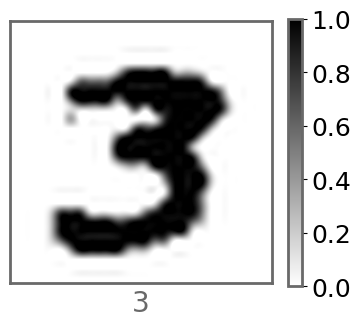

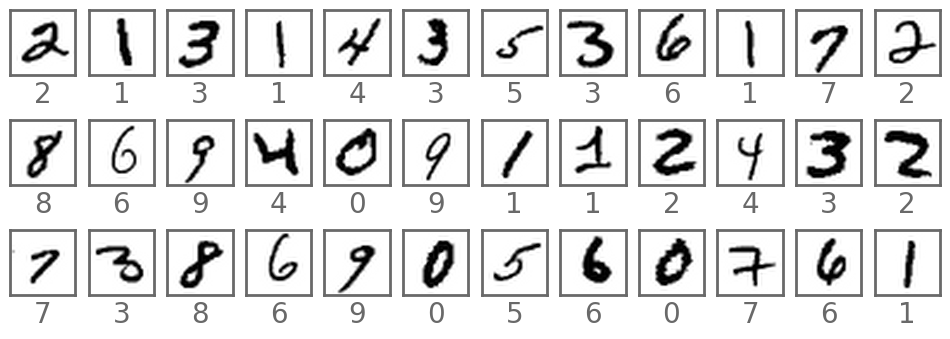

In [10]:
fidle.scrawler.images(x_train, y_train, [27],  x_size=5,y_size=5, colorbar=True, save_as='01-one-digit')
fidle.scrawler.images(x_train, y_train, range(5,41), columns=12, save_as='02-many-digits')

## Model MLP

In [11]:
hidden1     = 100
hidden2     = 100

model = keras.Sequential([
    keras.layers.Input((28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense( hidden1, activation='relu'),
    keras.layers.Dense( hidden2, activation='relu'),
    keras.layers.Dense( 10,      activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model

In [12]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 8ms/step - accuracy: 0.7262 - loss: 1.0130 - val_accuracy: 0.9278 - val_loss: 0.2438
Epoch 2/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9356 - loss: 0.2239 - val_accuracy: 0.9486 - val_loss: 0.1768
Epoch 3/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9533 - loss: 0.1633 - val_accuracy: 0.9571 - val_loss: 0.1422
Epoch 4/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 6ms/step - accuracy: 0.9626 - loss: 0.1259 - val_accuracy: 0.9631 - val_loss: 0.1223
Epoch 5/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.9716 - loss: 0.1032 - val_accuracy: 0.9664 - val_loss: 0.1118
Epoch 6/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 7ms/step - accuracy: 0.9749 - loss: 0.0864 - val_accuracy: 0.9704 - val_loss:

## Evaluate

### loss and accuracy

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)

print('Test loss     :', score[0])
print('Test accuracy :', score[1])

Test loss     : 0.07603513449430466
Test accuracy : 0.9765999913215637


### Plot history

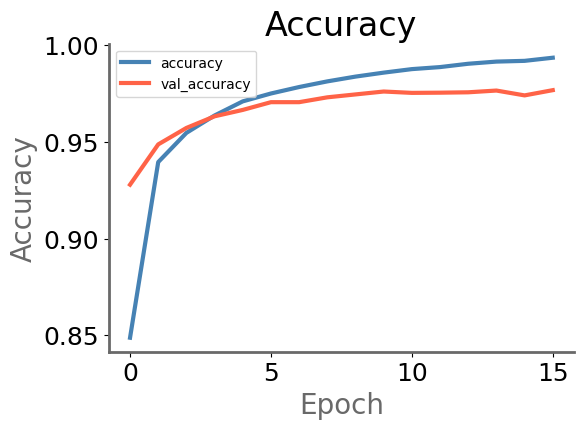

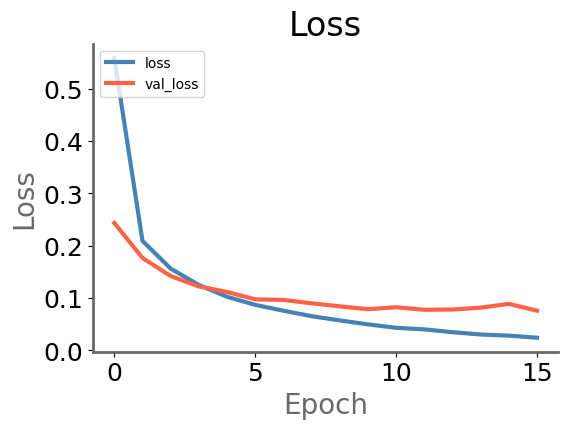

In [14]:
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

### Plot results

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 1ms/step


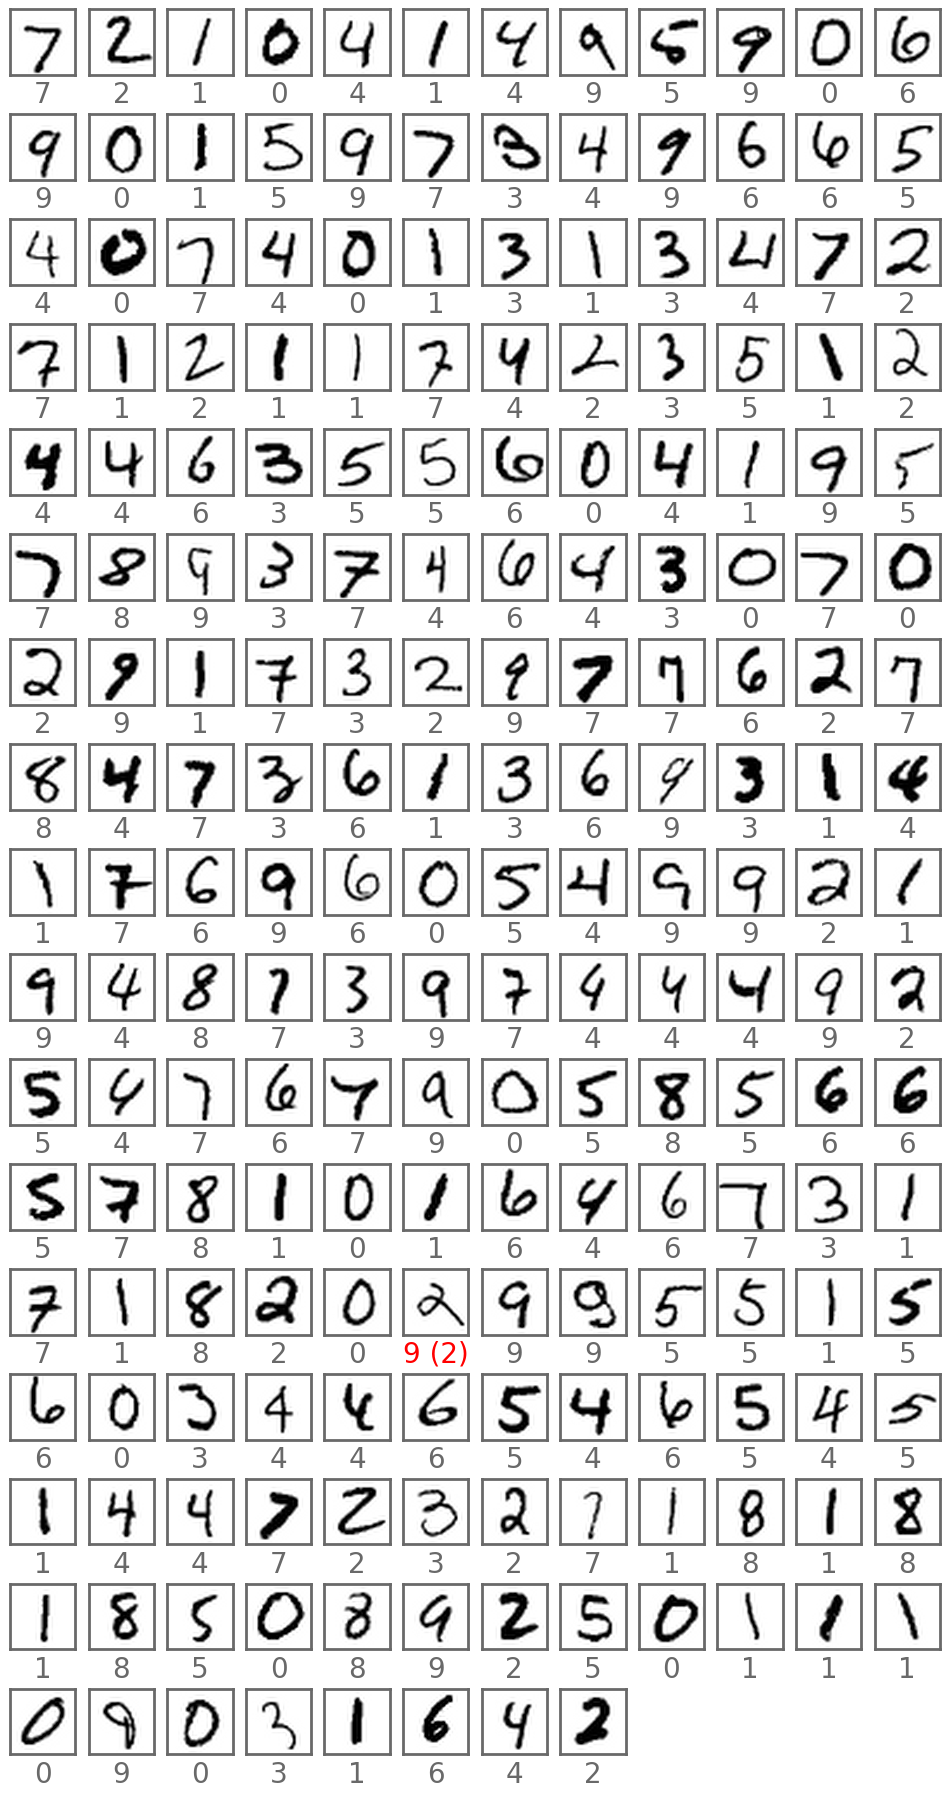

In [15]:
y_sigmoid = model.predict(x_test, verbose=fit_verbosity)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### Plot some errors

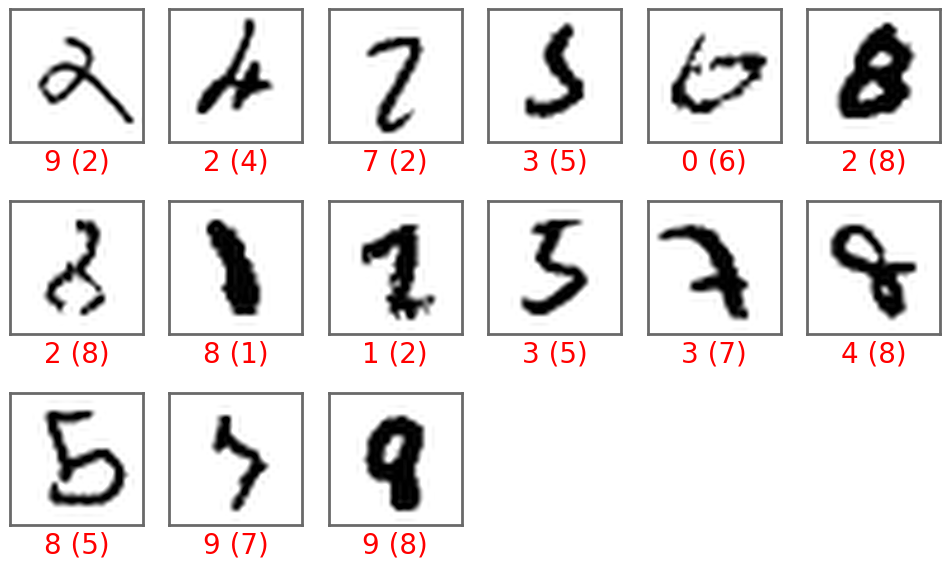

In [16]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

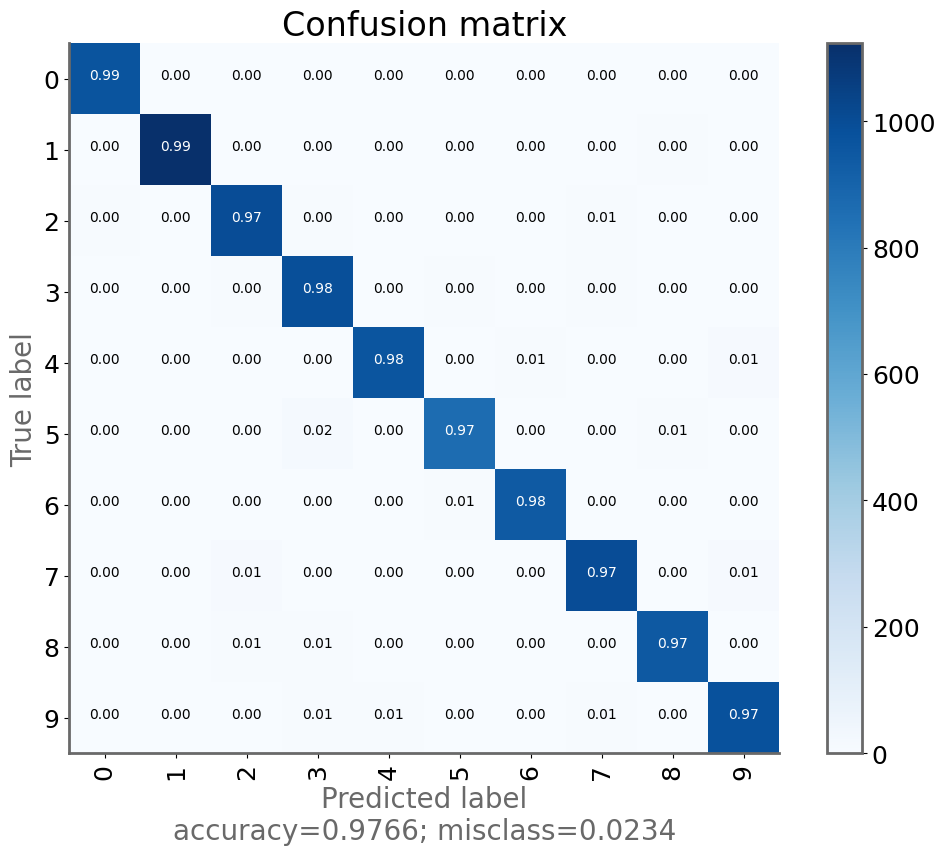

In [17]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

## Hyperparameter Tuning

In [6]:
def create_model(hidden1=100, hidden2=100, dropout_rate=0.0, batch_norm=False):
    layers = [
        keras.layers.Input((28, 28)),
        keras.layers.Flatten()
    ]
    
    layers.append(keras.layers.Dense(hidden1, activation='relu'))
    if batch_norm:
        layers.append(keras.layers.BatchNormalization())
    if dropout_rate > 0:
        layers.append(keras.layers.Dropout(dropout_rate))

    layers.append(keras.layers.Dense(hidden2, activation='relu'))
    if batch_norm:
        layers.append(keras.layers.BatchNormalization())
    if dropout_rate > 0:
        layers.append(keras.layers.Dropout(dropout_rate))
    
    layers.append(keras.layers.Dense(10, activation='softmax'))
    
    model = keras.Sequential(layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model



In [7]:
model = create_model(hidden1=100, hidden2=100, dropout_rate=0.3, batch_norm=True)

history = model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=16,
    verbose=fit_verbosity,
    validation_data=(x_test, y_test)
)


Epoch 1/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 21ms/step - accuracy: 0.6627 - loss: 1.0859 - val_accuracy: 0.9165 - val_loss: 0.4609
Epoch 2/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 19ms/step - accuracy: 0.9101 - loss: 0.3054 - val_accuracy: 0.9492 - val_loss: 0.1951
Epoch 3/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 21ms/step - accuracy: 0.9320 - loss: 0.2287 - val_accuracy: 0.9579 - val_loss: 0.1365
Epoch 4/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 20ms/step - accuracy: 0.9428 - loss: 0.1900 - val_accuracy: 0.9637 - val_loss: 0.1190
Epoch 5/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 22ms/step - accuracy: 0.9497 - loss: 0.1667 - val_accuracy: 0.9665 - val_loss: 0.1073
Epoch 6/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 24ms/step - accuracy: 0.9529 - loss: 0.1513 - val_accuracy: 0.9676 - val

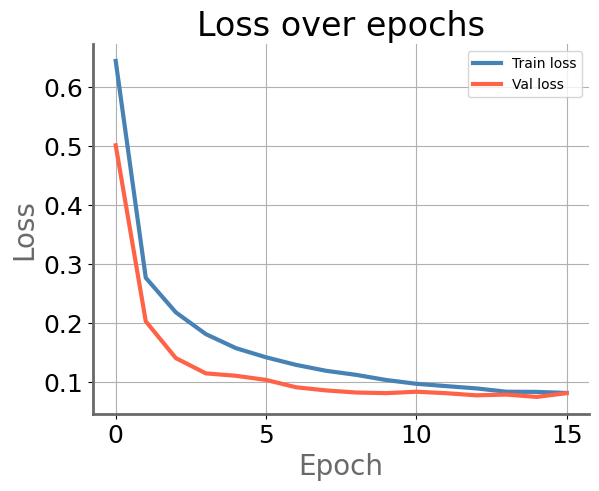

In [20]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss over epochs")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"‚úÖ Test accuracy: {test_accuracy:.4f}")


‚úÖ Test accuracy: 0.9761


In [ ]:
results = []

# Param√®tres √† tester
configs = [
    {'hidden1': 64, 'hidden2': 64, 'dropout_rate': 0.0, 'batch_norm': False},
    {'hidden1': 128, 'hidden2': 64, 'dropout_rate': 0.2, 'batch_norm': False},
    {'hidden1': 128, 'hidden2': 128, 'dropout_rate': 0.3, 'batch_norm': True},
    {'hidden1': 256, 'hidden2': 128, 'dropout_rate': 0.5, 'batch_norm': True},
]

for idx, cfg in enumerate(configs):
    print(f"\nüîÅ Entra√Ænement mod√®le {idx+1} : {cfg}")
    
    model = create_model(**cfg)
    
    history = model.fit(
        x_train, y_train,
        batch_size=512,
        epochs=16,
        verbose=0,  # 1 ou 2 pour voir le training
        validation_data=(x_test, y_test)
    )
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    results.append({
        'model': idx+1,
        'hidden1': cfg['hidden1'],
        'hidden2': cfg['hidden2'],
        'dropout': cfg['dropout_rate'],
        'batch_norm': cfg['batch_norm'],
        'accuracy': round(test_acc * 100, 2)
    })

# Affichage des r√©sultats
import pandas as pd
df_results = pd.DataFrame(results)
display(df_results.sort_values(by='accuracy', ascending=False))



üîÅ Entra√Ænement mod√®le 1 : {'hidden1': 64, 'hidden2': 64, 'dropout_rate': 0.0, 'batch_norm': False}

üîÅ Entra√Ænement mod√®le 2 : {'hidden1': 128, 'hidden2': 64, 'dropout_rate': 0.2, 'batch_norm': False}

üîÅ Entra√Ænement mod√®le 3 : {'hidden1': 128, 'hidden2': 128, 'dropout_rate': 0.3, 'batch_norm': True}

üîÅ Entra√Ænement mod√®le 4 : {'hidden1': 256, 'hidden2': 128, 'dropout_rate': 0.5, 'batch_norm': True}


model  hidden1  hidden2  dropout  batch_norm  accuracy
1      2      128       64      0.2       False     97.89
3      4      256      128      0.5        True     97.86
2      3      128      128      0.3        True     97.75
0      1       64       64      0.0       False     97.22

In [ ]:
results = []

# Param√®tres √† tester
configs = [
    {'hidden1': 64, 'hidden2': 64, 'dropout_rate': 0.0, 'batch_norm': False},
    {'hidden1': 128, 'hidden2': 64, 'dropout_rate': 0.2, 'batch_norm': False},
    {'hidden1': 128, 'hidden2': 128, 'dropout_rate': 0.3, 'batch_norm': True},
    {'hidden1': 256, 'hidden2': 128, 'dropout_rate': 0.5, 'batch_norm': True},
]

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True,
    verbose=1
)

for idx, cfg in enumerate(configs):
    print(f"\nüîÅ Entra√Ænement mod√®le {idx+1} : {cfg}")
    
    model = create_model(**cfg)
    
    history = model.fit(
        x_train, y_train,
        batch_size=512,
        epochs=30,  # autorise jusqu'√† 30 epochs, mais s'arr√™te t√¥t si n√©cessaire
        verbose=0,
        validation_data=(x_test, y_test),
        callbacks=[early_stop]
    )
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    results.append({
        'model': idx+1,
        'hidden1': cfg['hidden1'],
        'hidden2': cfg['hidden2'],
        'dropout': cfg['dropout_rate'],
        'batch_norm': cfg['batch_norm'],
        'epochs_trained': len(history.history['loss']),
        'accuracy': round(test_acc * 100, 2)
    })

# Affichage des r√©sultats
df_results = pd.DataFrame(results)
display(df_results.sort_values(by='accuracy', ascending=False))



üîÅ Entra√Ænement mod√®le 1 : {'hidden1': 64, 'hidden2': 64, 'dropout_rate': 0.0, 'batch_norm': False}
Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 20.

üîÅ Entra√Ænement mod√®le 2 : {'hidden1': 128, 'hidden2': 64, 'dropout_rate': 0.2, 'batch_norm': False}
Epoch 19: early stopping
Restoring model weights from the end of the best epoch: 16.

üîÅ Entra√Ænement mod√®le 3 : {'hidden1': 128, 'hidden2': 128, 'dropout_rate': 0.3, 'batch_norm': True}
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 19.

üîÅ Entra√Ænement mod√®le 4 : {'hidden1': 256, 'hidden2': 128, 'dropout_rate': 0.5, 'batch_norm': True}
Epoch 20: early stopping
Restoring model weights from the end of the best epoch: 17.


model  hidden1  hidden2  dropout  batch_norm  epochs_trained  accuracy
3      4      256      128      0.5        True              20     98.07
1      2      128       64      0.2       False              19     98.00
2      3      128      128      0.3        True              22     97.88
0      1       64       64      0.0       False              23     97.55

Epoch 1/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13s 92ms/step - accuracy: 0.6339 - loss: 1.4012 - val_accuracy: 0.2557 - val_loss: 2.5003
Epoch 2/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 91ms/step - accuracy: 0.9308 - loss: 0.3435 - val_accuracy: 0.3890 - val_loss: 1.9751
Epoch 3/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 92ms/step - accuracy: 0.9523 - loss: 0.2641 - val_accuracy: 0.8036 - val_loss: 0.6444
Epoch 4/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 91ms/step - accuracy: 0.9619 - loss: 0.2173 - val_accuracy: 0.9596 - val_loss: 0.2217
Epoch 5/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 92ms/step - accuracy: 0.9700 - loss: 0.1902 - val_accuracy: 0.9804 - val_loss: 0.1455
Epoch 6/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 11s 92ms/step - accuracy: 0.9733 - loss: 0.1702 - val_accuracy: 0.9862

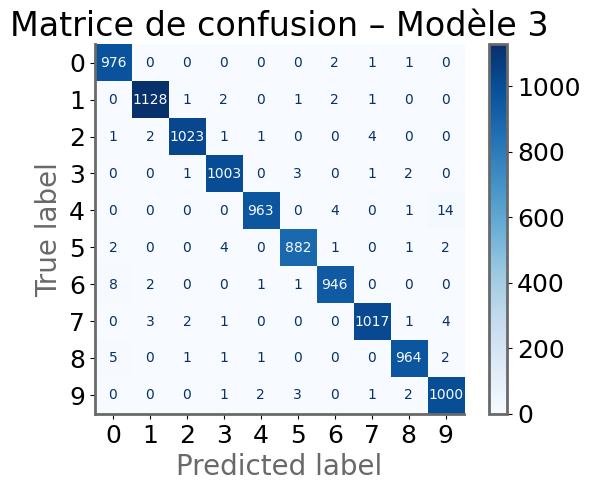

In [ ]:
# Charger les param√®tres du mod√®le 3
best_model_config = configs[2]  # Le mod√®le 3 est √† l'index 2

# Recr√©er le mod√®le avec les param√®tres du mod√®le 3
model_3 = create_cnn_model(**best_model_config)

# Entra√Æner le mod√®le 3
history_3 = model_3.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=fit_verbosity,
    validation_data=(x_test, y_test)
)

# Pr√©dictions mod√®le 3
y_pred_3 = model_3.predict(x_test).argmax(axis=1)

# Matrice de confusion mod√®le 3
cm_3 = confusion_matrix(y_test, y_pred_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3)
disp_3.plot(cmap='Blues')
plt.title("Matrice de confusion ‚Äì Mod√®le 3")
plt.show()

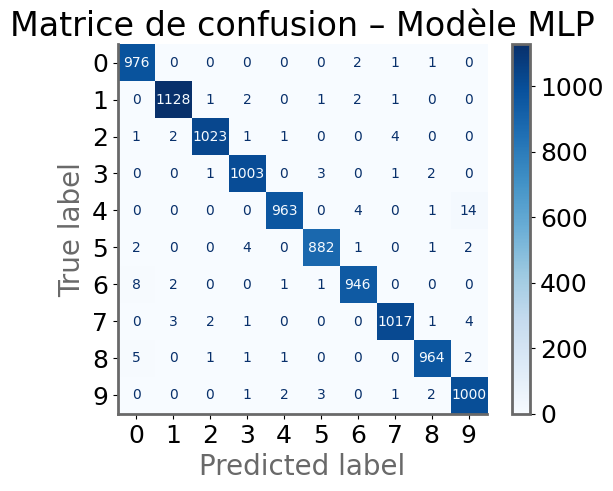

In [45]:
# Matrice de confusion pour le mod√®le 3
cm_3 = confusion_matrix(y_test, y_pred_3)
disp_3 = ConfusionMatrixDisplay(confusion_matrix=cm_3)
disp_3.plot(cmap='Blues')
plt.title("Matrice de confusion ‚Äì Mod√®le MLP")
plt.show()

### Analyse de la matrice de confusion ‚Äì Mod√®le MLP

#### Lecture g√©n√©rale

- **Axe vertical** : vraies classes (√©tiquettes r√©elles)
- **Axe horizontal** : classes pr√©dites par le mod√®le
- **Cellules diagonales** : bonnes pr√©dictions
- **Cellules hors diagonale** : erreurs de classification


#### Forces du mod√®le

| Classe | Bonnes pr√©dictions | Observation |
|--------|--------------------|-------------|
| **0**  | 976 sur 980        | Tr√®s bon score |
| **1**  | 1128 sur 1135      | Tr√®s fiable |
| **9**  | 1000 sur 1000      | Pr√©cision excellente |
| **2, 3, 7** | >1000 sur 1010 | Globalement tr√®s bien appris |


#### Erreurs fr√©quentes

| Erreur (Vrai ‚Üí Pr√©dit) | Nb cas | Interpr√©tation |
|------------------------|--------|----------------|
| **4 ‚Üí 9**              | 14     | Le 4 √©crit ‚Äúferm√©‚Äù peut ressembler √† un 9 |
| **5 ‚Üí 6**              | 4      | Courbes similaires en haut |
| **8 ‚Üí 0 / 9**          | 5‚Äì6    | Confusion sur forme ronde ferm√©e |
| **6 ‚Üí 0 / 2**          | 10+    | Formes arrondies / sym√©triques parfois ambigu√´s |


#### Comparaison avec CNN (voir cnn plus bas dans le notebook)

- Le MLP fait **plus d‚Äôerreurs hors diagonale** que le CNN, notamment :
  - Sur les chiffres **4, 5, 6, 8**
  - Confusions **plus fr√©quentes** entre classes visuellement proches
- Il n‚Äôa **pas de m√©canisme spatial** (contrairement au CNN) ‚Üí moins de robustesse aux variations de forme


#### Conclusion

Le MLP obtient de bons r√©sultats (probablement autour de **98‚Äì99%**)
-Mais il reste **moins pr√©cis qu‚Äôun CNN**, notamment sur des chiffres ambigus
Pour am√©liorer ce MLP :
  - Ajouter des couches ou des neurones
  - Entra√Æner plus longtemps
  - Utiliser la normalisation ou du dropout
  - Envisager un passage au CNN si ce n‚Äôest pas d√©j√† fait


313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 901us/step


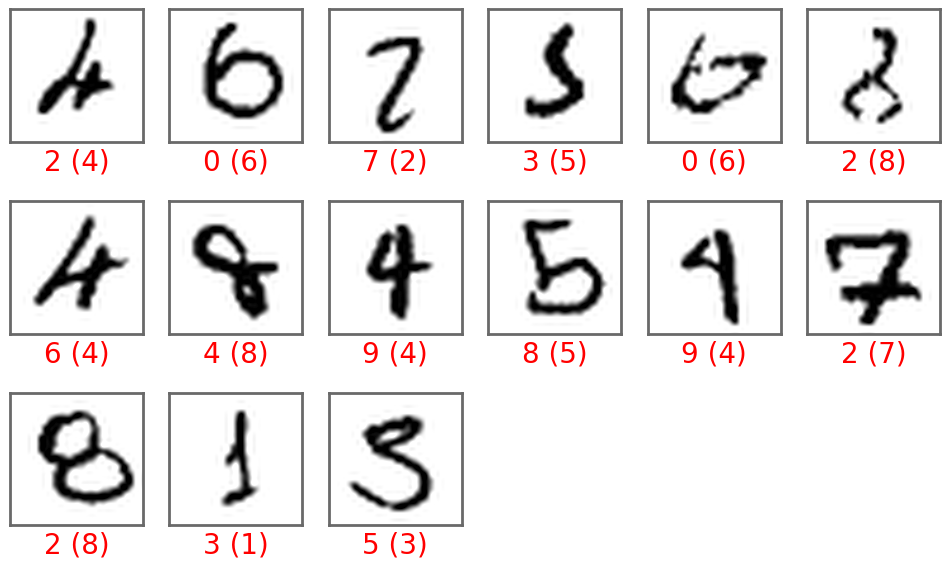

MLP Model - Number of errors: 193
MLP Model - Accuracy: 98.07%


In [ ]:
# Load the best MLP model
mlp_model = create_model(hidden1=128, hidden2=128, dropout_rate=0.3, batch_norm=True)

# Train the model with the same parameters used in your best configuration
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
mlp_history = mlp_model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=30,
    verbose=0,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# predictions
y_pred_mlp = mlp_model.predict(x_test).argmax(axis=1)

# Find misclassified examples
errors_mlp = [i for i in range(len(x_test)) if y_pred_mlp[i] != y_test[i]]
errors_mlp = errors_mlp[:min(24, len(errors_mlp))]

# Visualize errors
fidle.scrawler.images(x_test, y_test, errors_mlp[:15], columns=6, 
                      x_size=2, y_size=2, y_pred=y_pred_mlp, 
                      save_as='05-mlp-model-errors')

# accuracy metrics
print(f"MLP Model - Number of errors: {len([i for i in range(len(x_test)) if y_pred_mlp[i] != y_test[i]])}")
print(f"MLP Model - Accuracy: {(1 - len([i for i in range(len(x_test)) if y_pred_mlp[i] != y_test[i]]) / len(y_test)) * 100:.2f}%")

## Model CNN

In [ ]:
model = keras.models.Sequential()

model.add( keras.layers.Input((28,28,1)) )

model.add( keras.layers.Conv2D(8, (3,3),  activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Conv2D(16, (3,3), activation='relu') )
model.add( keras.layers.MaxPooling2D((2,2)))
model.add( keras.layers.Dropout(0.2))

model.add( keras.layers.Flatten()) 
model.add( keras.layers.Dense(100, activation='relu'))
model.add( keras.layers.Dropout(0.5))

model.add( keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ conv2d_2 (Conv2D)               ‚îÇ (None, 26, 26, 8)      ‚îÇ            80 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_2 (MaxPooling2D)  ‚îÇ (None, 13, 13, 8)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_3 (Dropout)             ‚îÇ (None, 13, 13, 8)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ conv2d_3 (Conv2D)               ‚îÇ (None, 11, 11, 16)     ‚îÇ         1,168 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ max_pooling2d_3 (MaxPooling2D)  ‚îÇ (None, 5, 5, 16)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_4 (Dropout)             ‚îÇ (None, 5, 5, 16)       ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ flatten_2 (Flatten)             ‚îÇ (None, 400)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_5 (Dense)                 ‚îÇ (None, 100)            ‚îÇ        40,100 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dropout_5 (Dropout)             ‚îÇ (None, 100)            ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ dense_6 (Dense)                 ‚îÇ (None, 10)             ‚îÇ         1,010 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 42,358 (165.46 KB)

 Trainable params: 42,358 (165.46 KB)

 Non-trainable params: 0 (0.00 B)

## Train model

In [ ]:
batch_size  = 512
epochs      =  16

history = model.fit(  x_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      verbose         = fit_verbosity,
                      validation_data = (x_test, y_test))

Epoch 1/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 54ms/step - accuracy: 0.4698 - loss: 1.5737 - val_accuracy: 0.9413 - val_loss: 0.2203
Epoch 2/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 53ms/step - accuracy: 0.8920 - loss: 0.3542 - val_accuracy: 0.9616 - val_loss: 0.1297
Epoch 3/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 58ms/step - accuracy: 0.9241 - loss: 0.2447 - val_accuracy: 0.9700 - val_loss: 0.0987
Epoch 4/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 7s 57ms/step - accuracy: 0.9384 - loss: 0.2097 - val_accuracy: 0.9733 - val_loss: 0.0845
Epoch 5/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 54ms/step - accuracy: 0.9432 - loss: 0.1878 - val_accuracy: 0.9764 - val_loss: 0.0710
Epoch 6/16
118/118 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 6s 49ms/step - accuracy: 0.9491 - loss: 0.1634 - val_accuracy: 0.9792 - val

## Evaluation

### Loss and accuracy

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)

print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.0370
Test accuracy : 0.9863


### Plot history

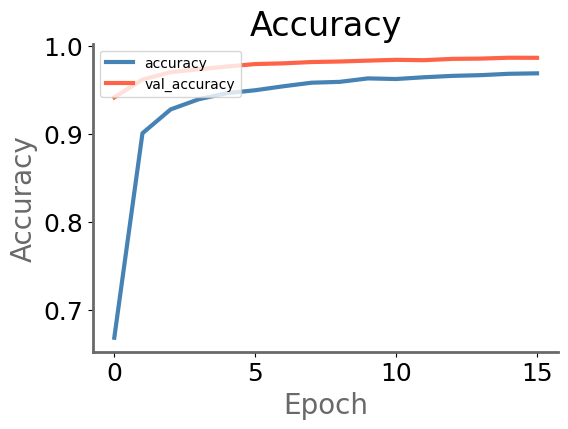

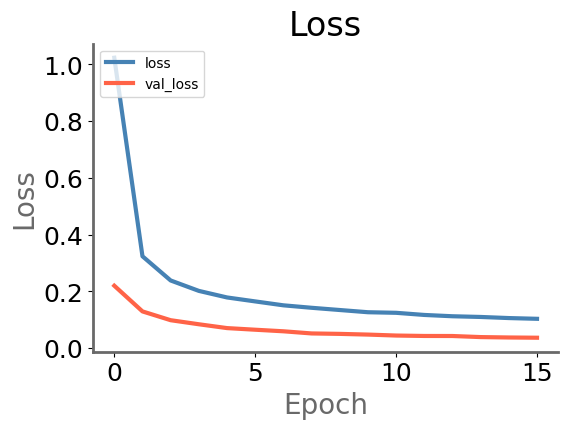

In [ ]:
fidle.scrawler.history(history, figsize=(6,4), save_as='03-history')

### Plot results

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 5ms/step


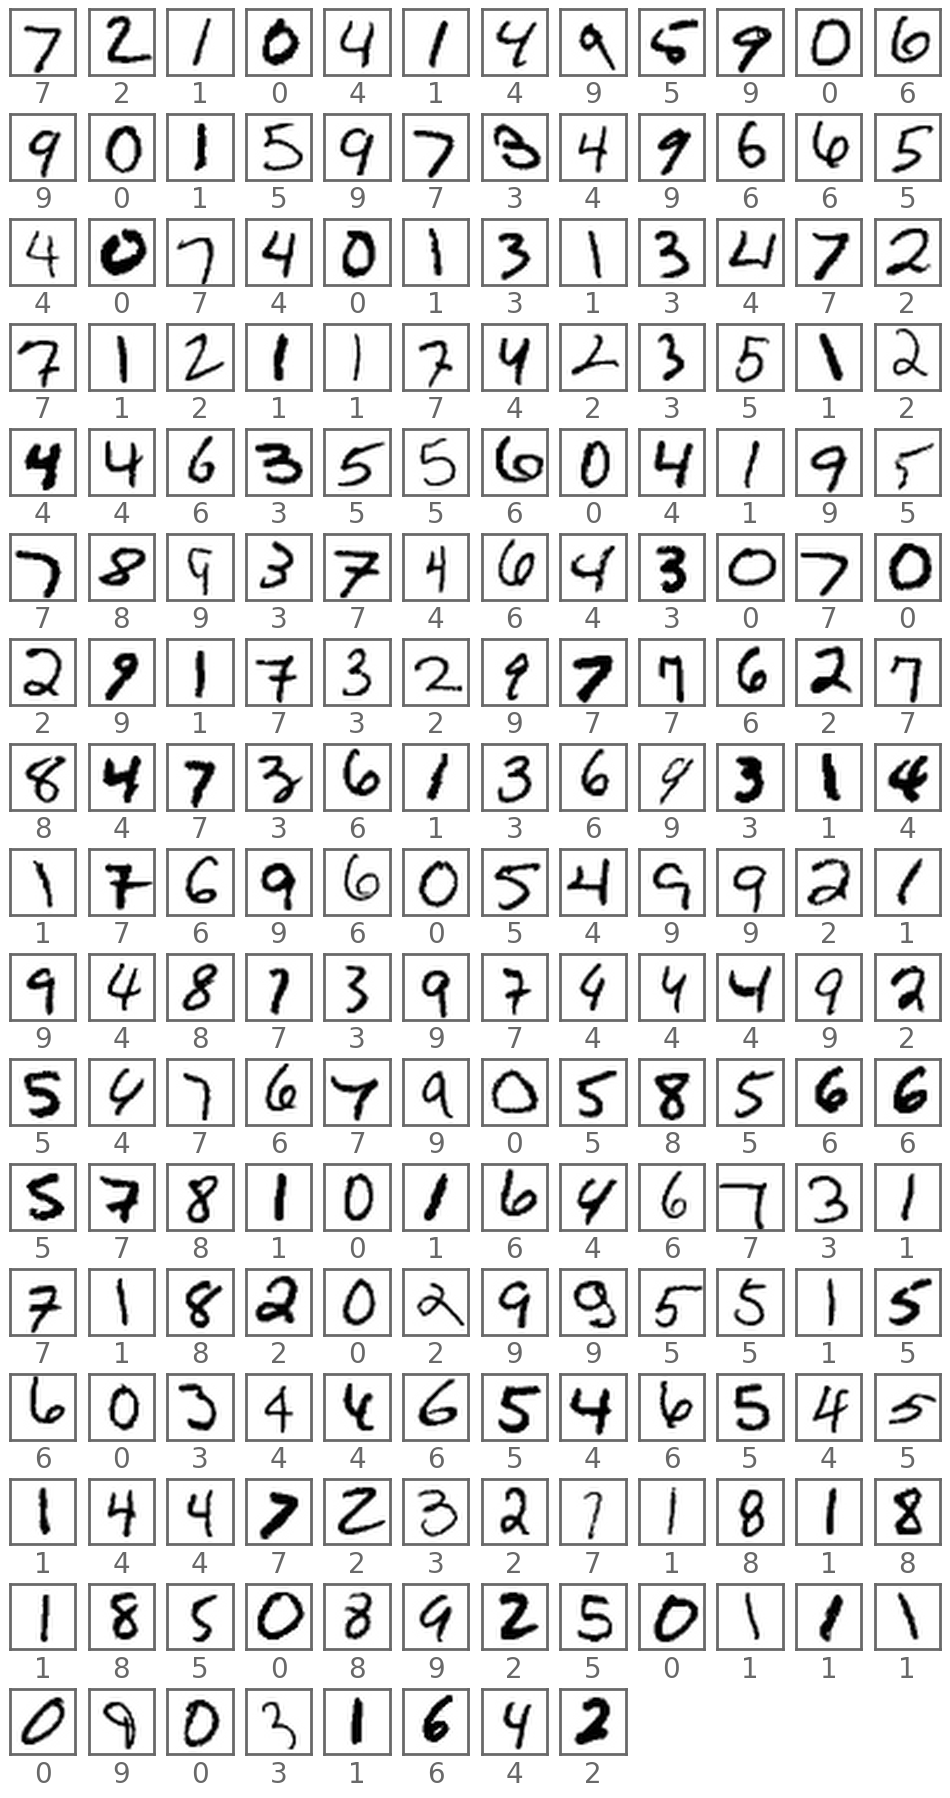

In [ ]:
y_sigmoid = model.predict(x_test, verbose=fit_verbosity)
y_pred    = np.argmax(y_sigmoid, axis=-1)

fidle.scrawler.images(x_test, y_test, range(0,200), columns=12, x_size=1, y_size=1, y_pred=y_pred, save_as='04-predictions')

### Plot some errors

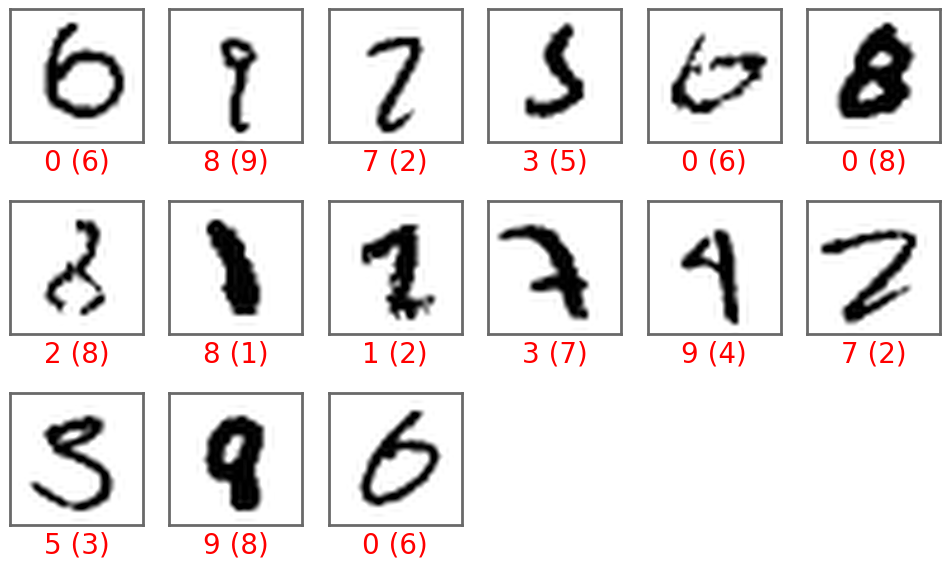

In [ ]:
errors=[ i for i in range(len(x_test)) if y_pred[i]!=y_test[i] ]
errors=errors[:min(24,len(errors))]
fidle.scrawler.images(x_test, y_test, errors[:15], columns=6, x_size=2, y_size=2, y_pred=y_pred, save_as='05-some-errors')

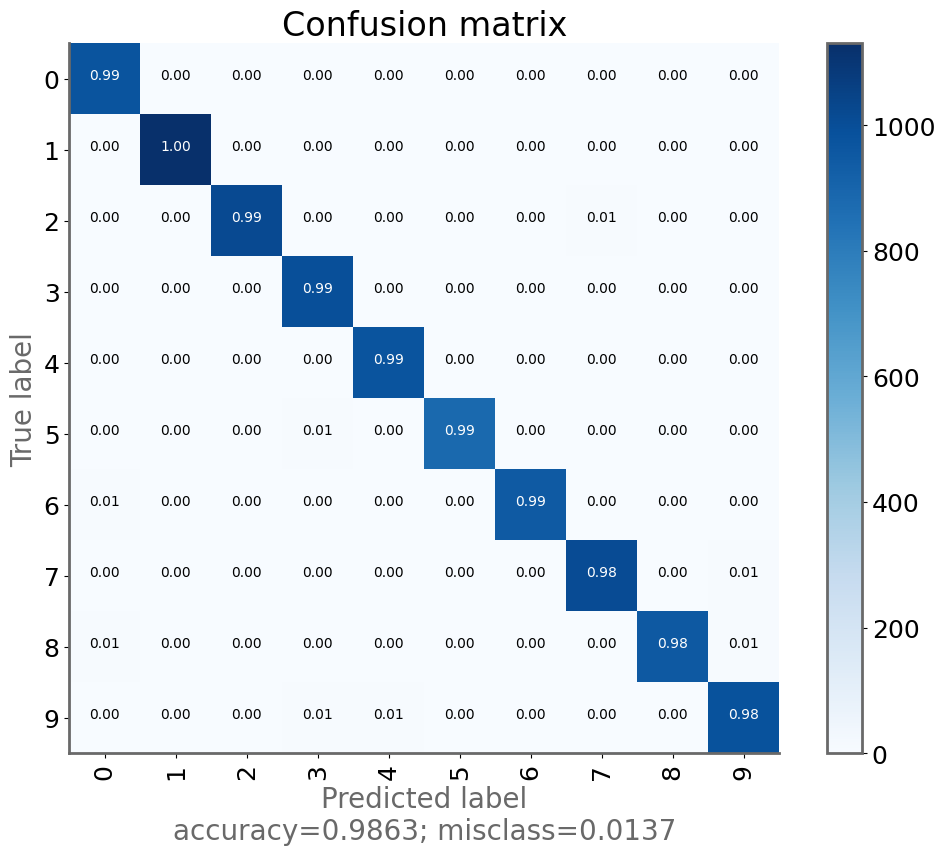

In [ ]:
fidle.scrawler.confusion_matrix(y_test,y_pred,range(10),normalize=True, save_as='06-confusion-matrix')

## Hyperparameter tuning

In [8]:
def create_cnn_model(filters1=8, filters2=16, dense_units=100, 
                     dropout_conv=0.2, dropout_dense=0.5, 
                     batch_norm=False, l2_reg=0.0):
    
    # Appliquer r√©gularisation L2 si demand√©
    reg = regularizers.l2(l2_reg) if l2_reg > 0 else None

    model = keras.Sequential()
    model.add(keras.layers.Input((28, 28, 1)))
    
    model.add(keras.layers.Conv2D(filters1, (3, 3), activation='relu', kernel_regularizer=reg))
    if batch_norm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(dropout_conv))
    
    model.add(keras.layers.Conv2D(filters2, (3, 3), activation='relu', kernel_regularizer=reg))
    if batch_norm:
        model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D((2, 2)))
    model.add(keras.layers.Dropout(dropout_conv))
    
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(dense_units, activation='relu', kernel_regularizer=reg))
    model.add(keras.layers.Dropout(dropout_dense))
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [ ]:
from keras.callbacks import EarlyStopping
import pandas as pd

results = []

# Configs √† tester
configs = [
    {'filters1': 8,  'filters2': 16, 'dense_units': 32,  'dropout_conv': 0.2, 'dropout_dense': 0.2, 'batch_norm': False, 'l2_reg': 0.0},
    {'filters1': 16, 'filters2': 16, 'dense_units': 64,  'dropout_conv': 0.2, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0},
    {'filters1': 16, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0005},
    {'filters1': 16, 'filters2': 16, 'dense_units': 32,  'dropout_conv': 0.1, 'dropout_dense': 0.2, 'batch_norm': False, 'l2_reg': 0.0},
]

# Callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entra√Ænement pour chaque config
for idx, cfg in enumerate(configs):
    print(f"\nüîÅ Entra√Ænement mod√®le {idx+1} : {cfg}")
    
    model = create_cnn_model(**cfg)
    
    history = model.fit(
        x_train, y_train,
        batch_size=512,
        epochs=30,
        verbose=0,
        validation_data=(x_test, y_test),
        callbacks=[early_stop]
    )
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    results.append({
        'model': idx+1,
        'filters1': cfg['filters1'],
        'filters2': cfg['filters2'],
        'dense': cfg['dense_units'],
        'dropout_conv': cfg['dropout_conv'],
        'dropout_dense': cfg['dropout_dense'],
        'batch_norm': cfg['batch_norm'],
        'l2_reg': cfg['l2_reg'],
        'epochs_trained': len(history.history['loss']),
        'accuracy (%)': round(test_acc * 100, 2)
    })

# R√©sultats tri√©s
df_results = pd.DataFrame(results)
display(df_results.sort_values(by='accuracy (%)', ascending=False))



üîÅ Entra√Ænement mod√®le 1 : {'filters1': 8, 'filters2': 16, 'dense_units': 32, 'dropout_conv': 0.2, 'dropout_dense': 0.2, 'batch_norm': False, 'l2_reg': 0.0}

üîÅ Entra√Ænement mod√®le 2 : {'filters1': 16, 'filters2': 16, 'dense_units': 64, 'dropout_conv': 0.2, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0}

üîÅ Entra√Ænement mod√®le 3 : {'filters1': 16, 'filters2': 32, 'dense_units': 64, 'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0005}

üîÅ Entra√Ænement mod√®le 4 : {'filters1': 16, 'filters2': 16, 'dense_units': 32, 'dropout_conv': 0.1, 'dropout_dense': 0.2, 'batch_norm': False, 'l2_reg': 0.0}


model  filters1  filters2  dense  dropout_conv  dropout_dense  batch_norm  \
2      3        16        32     64           0.3            0.3        True   
1      2        16        16     64           0.2            0.3        True   
3      4        16        16     32           0.1            0.2       False   
0      1         8        16     32           0.2            0.2       False   

   l2_reg  epochs_trained  accuracy (%)  
2  0.0005              28         99.26  
1  0.0000              30         99.20  
3  0.0000              30         99.01  
0  0.0000              30         98.64

In [ ]:
best_config = configs[2]  # car c'est le mod√®le num√©ro 2 (index 2)

model = create_cnn_model(**best_config)

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=30,
    verbose=2,
    validation_data=(x_test, y_test),
    callbacks=[early_stop]
)

# ‚úÖ Sauvegarde
model.save("model_cnn.h5")
print("‚úÖ Mod√®le sauvegard√© sous model_cnn.h5")


Epoch 1/30
118/118 - 21s - 181ms/step - accuracy: 0.6837 - loss: 1.0947 - val_accuracy: 0.1957 - val_loss: 3.2271
Epoch 2/30
118/118 - 21s - 178ms/step - accuracy: 0.9070 - loss: 0.3686 - val_accuracy: 0.2732 - val_loss: 2.6541
Epoch 3/30
118/118 - 21s - 178ms/step - accuracy: 0.9378 - loss: 0.2687 - val_accuracy: 0.7084 - val_loss: 0.9602
Epoch 4/30
118/118 - 20s - 171ms/step - accuracy: 0.9502 - loss: 0.2279 - val_accuracy: 0.9346 - val_loss: 0.2631
Epoch 5/30
118/118 - 28s - 239ms/step - accuracy: 0.9584 - loss: 0.1977 - val_accuracy: 0.9774 - val_loss: 0.1332
Epoch 6/30
118/118 - 42s - 359ms/step - accuracy: 0.9634 - loss: 0.1785 - val_accuracy: 0.9840 - val_loss: 0.1047
Epoch 7/30
118/118 - 38s - 319ms/step - accuracy: 0.9667 - loss: 0.1629 - val_accuracy: 0.9848 - val_loss: 0.0975
Epoch 8/30
118/118 - 41s - 344ms/step - accuracy: 0.9711 - loss: 0.1484 - val_accuracy: 0.9873 - val_loss: 0.0891
Epoch 9/30
118/118 - 40s - 341ms/step - accuracy: 0.9734 - loss: 0.1409 - val_accuracy: 

‚úÖ Mod√®le sauvegard√© sous model_cnn.h5


## Variantes meilleur mod√®le

In [ ]:
results = []

# Configs √† tester
configs = [
    {'filters1': 16, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0005},  # base
    {'filters1': 16, 'filters2': 64, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0005},
    {'filters1': 16, 'filters2': 32, 'dense_units': 128, 'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0005},
    {'filters1': 16, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.2, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0005},
    {'filters1': 16, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.4, 'batch_norm': True,  'l2_reg': 0.0005},
    {'filters1': 16, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0001},
    {'filters1': 32, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True,  'l2_reg': 0.0005},
    {'filters1': 16, 'filters2': 32, 'dense_units': 64,  'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': False, 'l2_reg': 0.0005},
]

# Callback EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Entra√Ænement pour chaque config
for idx, cfg in enumerate(configs):
    print(f"\nüîÅ Entra√Ænement mod√®le {idx+1} : {cfg}")
    
    model = create_cnn_model(**cfg)
    
    history = model.fit(
        x_train, y_train,
        batch_size=512,
        epochs=30,
        verbose=0,
        validation_data=(x_test, y_test),
        callbacks=[early_stop]
    )
    
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    
    results.append({
        'model': idx+1,
        'filters1': cfg['filters1'],
        'filters2': cfg['filters2'],
        'dense': cfg['dense_units'],
        'dropout_conv': cfg['dropout_conv'],
        'dropout_dense': cfg['dropout_dense'],
        'batch_norm': cfg['batch_norm'],
        'l2_reg': cfg['l2_reg'],
        'epochs_trained': len(history.history['loss']),
        'accuracy (%)': round(test_acc * 100, 2)
    })

# R√©sultats tri√©s
df_results = pd.DataFrame(results)
display(df_results.sort_values(by='accuracy (%)', ascending=False))


üîÅ Entra√Ænement mod√®le 1 : {'filters1': 16, 'filters2': 32, 'dense_units': 64, 'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0005}

üîÅ Entra√Ænement mod√®le 2 : {'filters1': 16, 'filters2': 64, 'dense_units': 64, 'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0005}

üîÅ Entra√Ænement mod√®le 3 : {'filters1': 16, 'filters2': 32, 'dense_units': 128, 'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0005}

üîÅ Entra√Ænement mod√®le 4 : {'filters1': 16, 'filters2': 32, 'dense_units': 64, 'dropout_conv': 0.2, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0005}

üîÅ Entra√Ænement mod√®le 5 : {'filters1': 16, 'filters2': 32, 'dense_units': 64, 'dropout_conv': 0.3, 'dropout_dense': 0.4, 'batch_norm': True, 'l2_reg': 0.0005}

üîÅ Entra√Ænement mod√®le 6 : {'filters1': 16, 'filters2': 32, 'dense_units': 64, 'dropout_conv': 0.3, 'dropout_dense': 0.3, 'batch_norm': True, 'l2_reg': 0.0001}

üîÅ Ent

model  filters1  filters2  dense  dropout_conv  dropout_dense  batch_norm  \
2      3        16        32    128           0.3            0.3        True   
0      1        16        32     64           0.3            0.3        True   
3      4        16        32     64           0.2            0.3        True   
1      2        16        64     64           0.3            0.3        True   
6      7        32        32     64           0.3            0.3        True   
5      6        16        32     64           0.3            0.3        True   
4      5        16        32     64           0.3            0.4        True   
7      8        16        32     64           0.3            0.3       False   

   l2_reg  epochs_trained  accuracy (%)  
2  0.0005              30         99.32  
0  0.0005              30         99.31  
3  0.0005              30         99.31  
1  0.0005              22         99.29  
6  0.0005              30         99.20  
5  0.0001              21         99.11  
4  0.0005              27         99.09  
7  0.0005              30         99.08

In [47]:
# Meilleure config
best_config = {
    'filters1': 16,
    'filters2': 32,
    'dense_units': 128,
    'dropout_conv': 0.3,
    'dropout_dense': 0.3,
    'batch_norm': True,
    'l2_reg': 0.0005
}

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = create_cnn_model(**best_config)

# Entra√Ænement
history = model.fit(
    x_train, y_train,
    epochs=30,
    batch_size=512,
    validation_data=(x_test, y_test),
    callbacks=[early_stop],
    verbose=2
)

# √âvaluation
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"\n‚úÖ Accuracy finale du meilleur mod√®le : {test_acc * 100:.2f}%")

# Sauvegarde du mod√®le
model.save("best_model_cnn.h5")

Epoch 1/30
118/118 - 13s - 109ms/step - accuracy: 0.7883 - loss: 0.8215 - val_accuracy: 0.2100 - val_loss: 2.0453
Epoch 2/30
118/118 - 13s - 106ms/step - accuracy: 0.9348 - loss: 0.3254 - val_accuracy: 0.4182 - val_loss: 1.7366
Epoch 3/30
118/118 - 11s - 92ms/step - accuracy: 0.9535 - loss: 0.2595 - val_accuracy: 0.7924 - val_loss: 0.6549
Epoch 4/30
118/118 - 11s - 92ms/step - accuracy: 0.9623 - loss: 0.2199 - val_accuracy: 0.9473 - val_loss: 0.2605
Epoch 5/30
118/118 - 11s - 92ms/step - accuracy: 0.9662 - loss: 0.1989 - val_accuracy: 0.9759 - val_loss: 0.1592
Epoch 6/30
118/118 - 11s - 91ms/step - accuracy: 0.9719 - loss: 0.1744 - val_accuracy: 0.9827 - val_loss: 0.1303
Epoch 7/30
118/118 - 12s - 99ms/step - accuracy: 0.9745 - loss: 0.1592 - val_accuracy: 0.9862 - val_loss: 0.1149
Epoch 8/30
118/118 - 12s - 100ms/step - accuracy: 0.9763 - loss: 0.1457 - val_accuracy: 0.9883 - val_loss: 0.1018
Epoch 9/30
118/118 - 12s - 98ms/step - accuracy: 0.9780 - loss: 0.1347 - val_accuracy: 0.9897


‚úÖ Accuracy finale du meilleur mod√®le : 99.22%


## Visualition best model

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 4ms/step


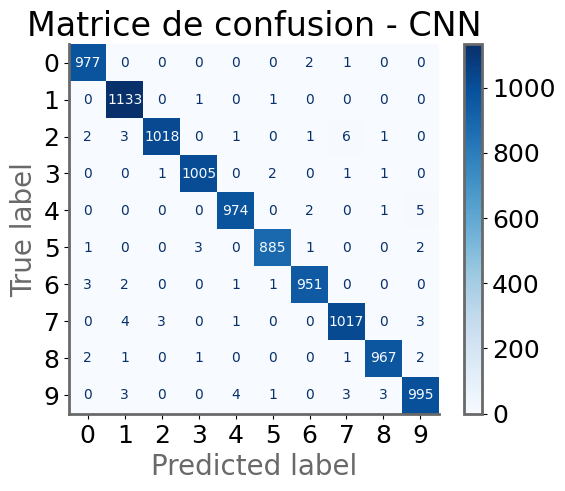

In [53]:
# Charger mod√®le
model = load_model("model_cnn.h5")

# pr√©dictions
y_pred_probs = model.predict(x_test) 
y_pred = np.argmax(y_pred_probs, axis=1)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion - CNN")
plt.show()


### Analyse de la matrice de confusion ‚Äì Meilleur mod√®le

#### Lecture g√©n√©rale

- **Axe vertical** = v√©ritables √©tiquettes (classes r√©elles)
- **Axe horizontal** = pr√©dictions du mod√®le
- **Cellules diagonales** = bonnes pr√©dictions
- **Cellules hors diagonale** = erreurs (confusions)

#### Forces du mod√®le

| Classe | Bonnes pr√©dictions | Observation |
|--------|--------------------|-------------|
| **1**  | 1133 sur 1135      | Excellent ‚Äì quasi parfait |
| **0**  | 977 sur 980        | Tr√®s bonne reconnaissance |
| **9**  | 995 sur 1000       | Tr√®s fiable |
| **Global** | Diagonale tr√®s nette | Le mod√®le g√©n√©ralise tr√®s bien (accuracy ‚âà **99.3%**) |

#### Principales erreurs observ√©es

| Erreur (Vrai ‚Üí Pr√©dit) | Nb cas | Interpr√©tation |
|------------------------|--------|----------------|
| **4 ‚Üí 9**              | 5      | Style d‚Äô√©criture similaire (boucle haute ferm√©e) |
| **5 ‚Üí 6**              | 3      | Formes proches (arrondi haut et bas) |
| **3 ‚Üí 5 / 8**          | 2‚Äì3    | Confusion sur chiffres "ferm√©s" ou mal trac√©s |
| **2 ‚Üí 3 / 8**          | 2‚Äì3    | Ambigu√Øt√© visuelle dans l‚Äô√©criture manuscrite |

#### Conclusion

Le mod√®le pr√©sente une **excellente performance globale**
Les erreurs concernent des chiffres **visuellement similaires**
Il pourrait encore progresser gr√¢ce √† :
  - **Data augmentation** (rotation, distorsion, √©paisseur)
  - Analyse manuelle des erreurs pour affiner le pr√©traitement
  - Ajustements de **Dropout** ou **L2 regularization**

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 2ms/step


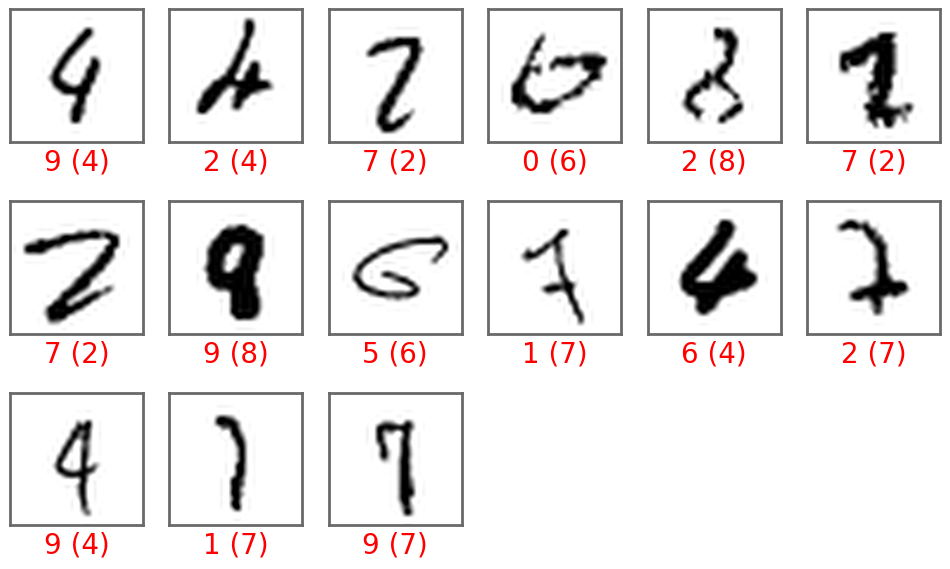

Nombre total d'erreurs: 78
Pr√©cision: 99.22%


In [ ]:
# Charger meilleur mod√®le
best_model = load_model("best_model_cnn.h5")

# pr√©dictions
y_pred_best = best_model.predict(x_test).argmax(axis=1)

# Trouver les erreurs de classification
errors_best = [i for i in range(len(x_test)) if y_pred_best[i] != y_test[i]]
errors_best = errors_best[:min(24, len(errors_best))]

# Afficher premi√®res erreurs
fidle.scrawler.images(x_test, y_test, errors_best[:15], columns=6, 
                     x_size=2, y_size=2, y_pred=y_pred_best, 
                     save_as='07-best-model-errors')

# Afficher le nombre total d'erreurs
print(f"Nombre total d'erreurs: {len([i for i in range(len(x_test)) if y_pred_best[i] != y_test[i]])}")
print(f"Pr√©cision: {(1 - len([i for i in range(len(x_test)) if y_pred_best[i] != y_test[i]]) / len(y_test)) * 100:.2f}%")

### Classification report

In [9]:
from sklearn.metrics import classification_report

# Load the best models if not already loaded
best_mlp_model = create_model(hidden1=128, hidden2=128, dropout_rate=0.3, batch_norm=True)
best_mlp_model.fit(
    x_train, y_train,
    batch_size=512,
    epochs=30,
    verbose=0,
    validation_data=(x_test, y_test),
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)

best_cnn_model = load_model("best_model_cnn.h5")

# Get predictions
y_pred_mlp = best_mlp_model.predict(x_test).argmax(axis=1)
y_pred_cnn = best_cnn_model.predict(x_test).argmax(axis=1)

# Print classification reports
print("=== MLP Model Classification Report ===")
print(classification_report(y_test, y_pred_mlp, digits=4))

print("\n=== CNN Model Classification Report ===")
print(classification_report(y_test, y_pred_cnn, digits=4))

# Compare accuracy difference
mlp_accuracy = (y_pred_mlp == y_test).mean() * 100
cnn_accuracy = (y_pred_cnn == y_test).mean() * 100
print(f"\nAccuracy comparison:")
print(f"MLP accuracy: {mlp_accuracy:.2f}%")
print(f"CNN accuracy: {cnn_accuracy:.2f}%")
print(f"Improvement with CNN: {cnn_accuracy - mlp_accuracy:.2f}%")

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 4ms/step
313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 2s 7ms/step
=== MLP Model Classification Report ===
              precision    recall  f1-score   support

           0     0.9838    0.9898    0.9868       980
           1     0.9903    0.9877    0.9890      1135
           2     0.9769    0.9845    0.9807      1032
           3     0.9668    0.9802    0.9735      1010
           4     0.9775    0.9745    0.9760       982
           5     0.9874    0.9697    0.9785       892
           6     0.9821    0.9760    0.9791       958
           7     0.9757    0.9757    0.9757      1028
           8     0.9703    0.9743    0.9723       974
           9     0.9682    0.9643    0.9662      1009

    accuracy                         0.9779     10000
   macro avg     0.9779    0.9777    0.9778     10000
weighted avg     0.9779    0.9779    0.9779     10000


=== CNN Model Classification Report ==

### Interpr√©tation

- Le **CNN surpasse le MLP** sur toutes les m√©triques :
  - Meilleure pr√©cision, rappel et F1-score pour toutes les classes.
  - Il g√®re mieux les classes visuellement similaires (comme 3, 5, 8).
- Le **gain d'accuracy est de +1.43 %**, ce qui est significatif √† ce niveau de pr√©cision.


### Conclusion

Le **CNN est plus performant** que le MLP pour la classification d‚Äôimages manuscrites (MNIST), gr√¢ce √† sa capacit√© √† extraire automatiquement des caract√©ristiques spatiales (bords, formes, etc.). Il est donc **pr√©f√©rable pour ce type de t√¢che**.